In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('thermal_conductivity_final.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.describe()

,GR,DPHI,TNPH,TBIT10,TBIT20,TBIT30,TBIT60,TBIT90,DTCO_MPS_FINAL,DTSH_PNS_FINAL,RHOB,YME_STA,UCS,DTST,SLOANI,TIMANI,TXSG_ISO,TZSG,K(cond)
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000
mean,133.040857,0.036232,0.056702,1848.740147,133.498346,45.636865,138.379860,296.131513,52.932790,97.061891,2.590230,4.161920,17654.865205,210.521179,2.434807,5.467624,0.809923,1.107142,1.692993
std,50.486926,0.013972,0.018046,395.143648,159.238167,47.008192,148.646571,306.961029,1.853284,4.404998,0.022057,0.547630,2323.047469,1.703618,4.497760,3.600441,0.034202,0.001445,0.021318
min,26.541360,-0.033088,0.026968,0.078311,0.073757,0.071409,0.070830,0.071988,45.112720,66.525600,2.274126,0.927673,3935.188000,203.828700,-20.428480,0.001769,0.602155,1.103766,1.420321
25%,94.154005,0.028946,0.043094,1950.000000,63.222485,30.263043,70.491557,115.525550,52.016357,94.168252,2.581674,3.841834,16297.057500,209.301325,-0.110737,3.305335,0.794718,1.106144,1.684615
50%,127.994200,0.035348,0.052987,1950.000000,98.157140,38.215195,105.815900,207.432150,52.736635,96.938985,2.591572,4.160544,17649.025000,210.590100,2.007817,5.045203,0.814319,1.107308,1.694228
75%,158.808100,0.041557,0.067519,1950.000000,147.435350,51.321017,158.156750,352.136625,53.526070,99.725018,2.601879,4.468942,18957.250000,211.530350,4.446368,6.857354,0.832956,1.108413,1.704195
max,738.702100,0.227802,0.268306,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,71.628940,125.478100,2.683704,11.102530,47096.910000,228.937300,56.237790,26.108920,0.908981,1.109286,1.803869


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [5]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [6]:
y_test_pred = regressor.predict(X_test)

In [7]:
y_train_pred = regressor.predict(X_train)

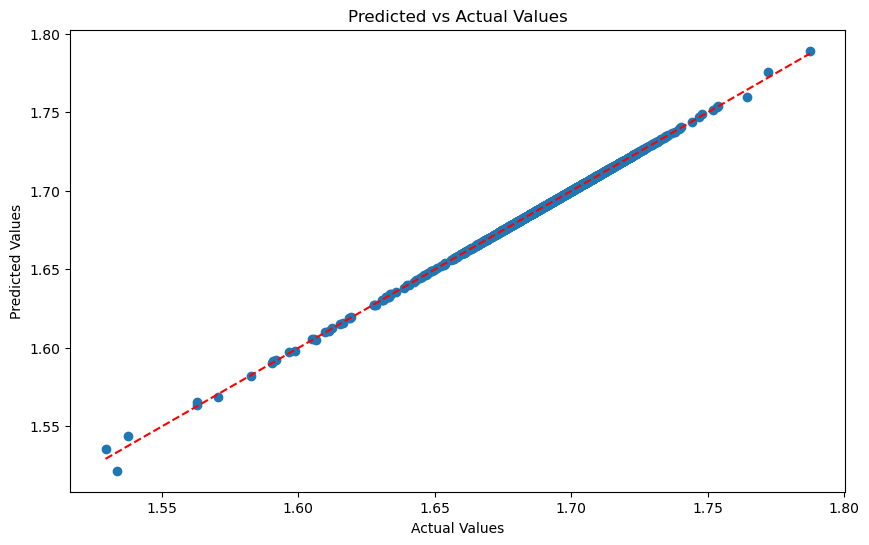

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect predictions
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

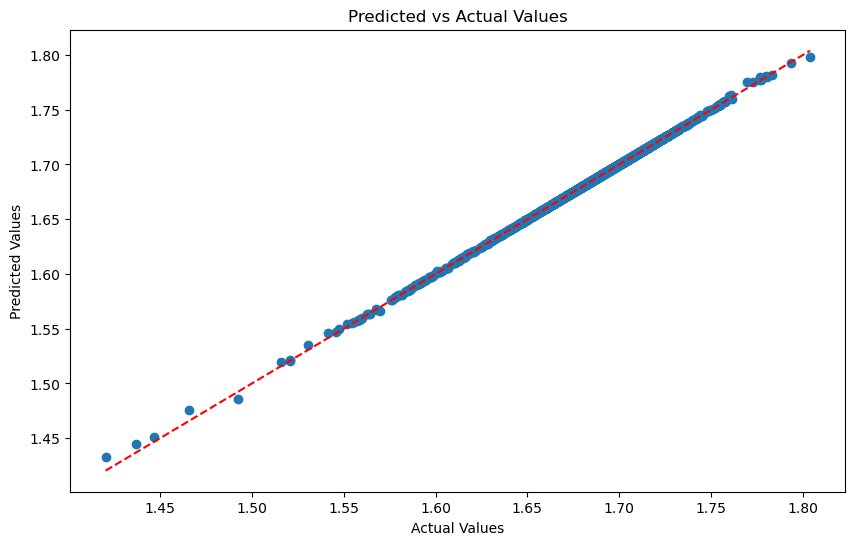

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # Line of perfect predictions
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [11]:
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
mape = np.mean(np.abs((np.array(y_test) - np.array(y_test_pred)) / np.array(y_test))) * 100

# Print the results
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)
print("Mean Absolute Percentage Error:", mape, "%")

Mean Squared Error: 1.4501390189745128e-07
Root Mean Squared Error: 0.00038080690894133114
Mean Absolute Error: 4.286131466146996e-05
R² Score: 0.9996427162006655
Mean Absolute Percentage Error: 0.0026298602766606197 %


In [12]:
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)
mape = np.mean(np.abs((np.array(y_train) - np.array(y_train_pred)) / np.array(y_train))) * 100

# Print the results
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R² Score:", r2)
print("Mean Absolute Percentage Error:", mape, "%")

Mean Squared Error: 7.848505575482296e-08
Root Mean Squared Error: 0.0002801518441039126
Mean Absolute Error: 2.6041409816513868e-05
R² Score: 0.9998317698277372
Mean Absolute Percentage Error: 0.0016164660464840844 %


In [13]:
predictions = regressor.predict(X)

In [14]:
new_df = pd.DataFrame({'Predictions': predictions})
joined_data = dataset.join(new_df)
joined_data.head()

,GR,DPHI,TNPH,TBIT10,TBIT20,TBIT30,TBIT60,TBIT90,DTCO_MPS_FINAL,DTSH_PNS_FINAL,RHOB,YME_STA,UCS,DTST,SLOANI,TIMANI,TXSG_ISO,TZSG,K(cond),Predictions
0,133.2880,0.035372,0.061501,1950.0,876.0785,85.85635,236.7023,1430.5400,56.94103,98.89021,2.591483,3.802793,16131.45,208.0918,-4.069155,0.818450,0.850168,1.103766,1.694190,1.694187
1,141.2310,0.034830,0.061533,1950.0,797.6779,77.46809,207.2923,720.5583,56.97847,100.58660,2.592007,3.885505,16482.31,208.0757,-4.029021,0.740217,0.848855,1.103768,1.695031,1.695028
2,137.1627,0.030458,0.060160,1950.0,488.2031,59.74663,119.4464,302.2662,57.15356,102.12170,2.595690,3.986692,16911.55,208.0272,-5.852238,0.642289,0.848307,1.103769,1.701835,1.701830
3,140.2624,0.032882,0.059916,1950.0,633.6127,61.63119,132.2877,319.1900,57.41502,103.30590,2.594137,4.044345,17156.11,207.9688,-4.997652,0.549908,0.845671,1.103771,1.698059,1.698059
4,151.1480,0.031895,0.059520,1950.0,803.0419,62.33526,161.0621,608.9658,57.77623,103.88680,2.598559,4.110643,17437.35,207.9688,-5.015064,0.419688,0.843553,1.103773,1.699596,1.699599


In [15]:
dataset_thermal = pd.read_csv('thermal_conductivity.csv')

In [16]:
N = dataset_thermal.iloc[:, 0]
print(N)

0        6008.0
1        6008.5
2        6009.0
3        6009.5
4        6010.0
         ...   
9685    10890.0
9686    10890.5
9687    10891.0
9688    10891.5
9689    10892.0
Name: MD, Length: 9690, dtype: float64


In [17]:
new = pd.DataFrame({'Depth': N})
joined_data = joined_data.join(new)
joined_data.head()

,GR,DPHI,TNPH,TBIT10,TBIT20,TBIT30,TBIT60,TBIT90,DTCO_MPS_FINAL,DTSH_PNS_FINAL,...,YME_STA,UCS,DTST,SLOANI,TIMANI,TXSG_ISO,TZSG,K(cond),Predictions,Depth
0,133.2880,0.035372,0.061501,1950.0,876.0785,85.85635,236.7023,1430.5400,56.94103,98.89021,...,3.802793,16131.45,208.0918,-4.069155,0.818450,0.850168,1.103766,1.694190,1.694187,6008.0
1,141.2310,0.034830,0.061533,1950.0,797.6779,77.46809,207.2923,720.5583,56.97847,100.58660,...,3.885505,16482.31,208.0757,-4.029021,0.740217,0.848855,1.103768,1.695031,1.695028,6008.5
2,137.1627,0.030458,0.060160,1950.0,488.2031,59.74663,119.4464,302.2662,57.15356,102.12170,...,3.986692,16911.55,208.0272,-5.852238,0.642289,0.848307,1.103769,1.701835,1.701830,6009.0
3,140.2624,0.032882,0.059916,1950.0,633.6127,61.63119,132.2877,319.1900,57.41502,103.30590,...,4.044345,17156.11,207.9688,-4.997652,0.549908,0.845671,1.103771,1.698059,1.698059,6009.5
4,151.1480,0.031895,0.059520,1950.0,803.0419,62.33526,161.0621,608.9658,57.77623,103.88680,...,4.110643,17437.35,207.9688,-5.015064,0.419688,0.843553,1.103773,1.699596,1.699599,6010.0


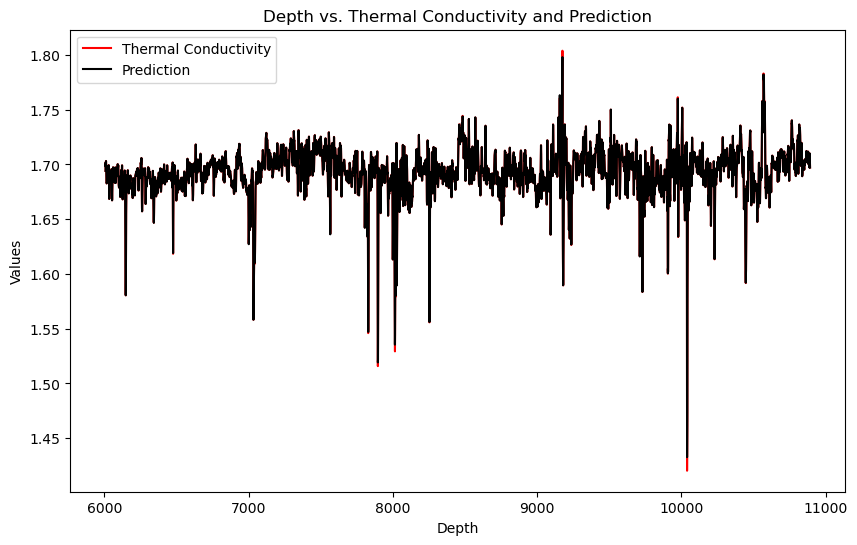

In [18]:
plt.figure(figsize=(10, 6))

# Plotting Heat Capacity vs. Depth
plt.plot(joined_data['Depth'], joined_data['K(cond)'], label='Thermal Conductivity', color='red')

# Plotting Prediction vs. Depth
plt.plot(joined_data['Depth'], joined_data['Predictions'], label='Prediction', color='black')

# Line of perfect prediction for Heat Capacity (y=x line assuming Prediction ideally matches Heat Capacity)


# Adding labels and legend
plt.xlabel('Depth')
plt.ylabel('Values')
plt.title('Depth vs. Thermal Conductivity and Prediction')
plt.legend()  # Automatically uses labels from each plot command

# Show the plot
plt.show()